# Implementation Of Time Series Model

### Time Series Basically involves 3 Basic Models that are-:

1. AR (Auto Regressive Model)

2. MA (Moving Avearge Model)

3. ARMA (Auto Regressive Moving Avarage Model)

4. ARIMA (Auto Regressive Integrated Moving Avarage Model)


#### Importing Packages

In [1]:
#importing all 
import numpy as np 
import pandas as pd
import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot

init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns



#### Reading Data

In [2]:
data = pd.read_csv(r"C:\Users\dell\Downloads\airline_passengers.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    145 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [4]:
data.drop(144,axis=0,inplace=True)

In [5]:
import datetime as dt
data["Month"] = pd.to_datetime(data["Month"])

In [6]:
data = data.set_index("Month")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Thousands of Passengers  144 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [8]:
data = data.iloc[: ,0]

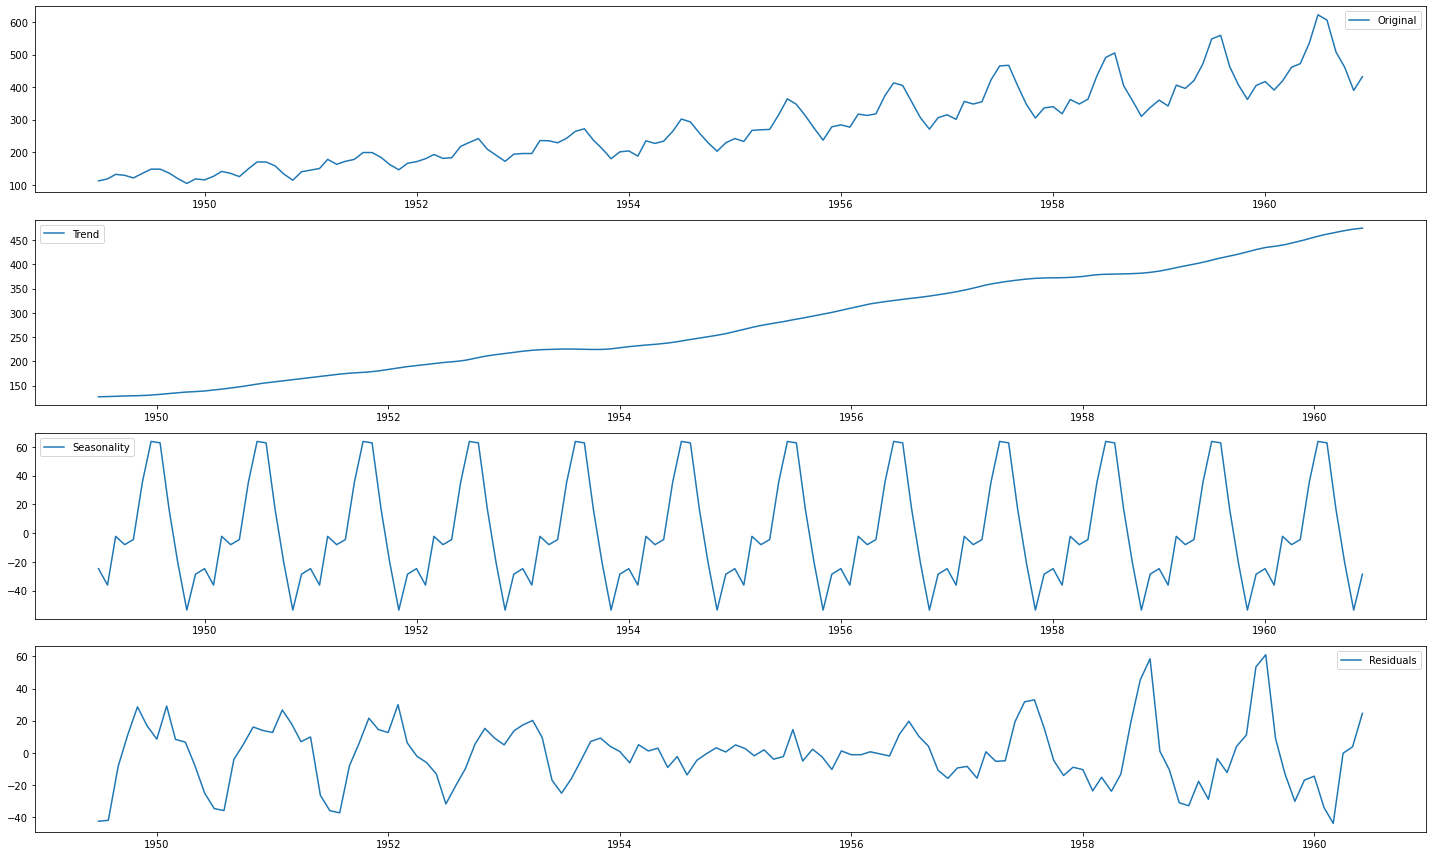

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(20,12))
plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [10]:
#reading data with date column as index
data = pd.read_csv(r"C:\Users\dell\Downloads\airline_passengers.csv", header = 0 , index_col = 0)

In [11]:
data.head(10)

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0
1949-06,135.0
1949-07,148.0
1949-08,148.0
1949-09,136.0


In [12]:
#info. of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 1949-01 to International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Thousands of Passengers  144 non-null    float64
dtypes: float64(1)
memory usage: 2.3+ KB


In [13]:
#taking first column in consideration
data = data.iloc[: ,0]

In [14]:
#shape of data
data.shape

(145,)

In [15]:
#converting into dataframe
data = pd.DataFrame(data)

In [16]:
data.shape

(145, 1)

In [17]:
data.tail()

,Thousands of Passengers
Month,
1960-09,508.0
1960-10,461.0
1960-11,390.0
1960-12,432.0
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60,NaN


In [18]:
data = data.dropna()

In [19]:
data.tail()

,Thousands of Passengers
Month,
1960-08,606.0
1960-09,508.0
1960-10,461.0
1960-11,390.0
1960-12,432.0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Thousands of Passengers  144 non-null    float64
dtypes: float64(1)
memory usage: 2.2+ KB


In [21]:
#head of data
data.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


## Auto Regression Model

Autoregression is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step.

It is a very simple idea that can result in accurate forecasts on a range of time series problems.

A regression model, such as linear regression, models an output value based on a linear combination of input values.

The Equation Of the Model can be termed as or stated as-:

𝑦𝑡  = a + b 𝑦𝑡−1  +  𝑒𝑡 

yt to be predicted

a is the intercept 

e  is the coefficient

b is the slope

t-1 is the lag for AR(1) this can be till t-k for AR(K). AR(1) is the first-order autoregression.

If we need to predict for two years data then, the equation can be as-:

𝑦𝑡  = a + 𝑏1𝑦𝑡−1 + 𝑏2𝑦𝑡−2 + 𝑒𝑡 

This upper model will be second order autoregression, written as AR(2), since the value at time t is predicted from the values at times t-1 and t-2.

More generally, a  𝑘𝑡ℎ -order autoregression, written as AR(k), is a multiple linear regression in which the value of the series at any time t is a (linear) function of the values at times t-1 , t-2 , ... t-k.

In this there is a major assumption that lag and data to be predicted should not be autocorrelated to each other. The intercept taken majorly is 0.


### AutoCorrelation

An autoregression model makes an assumption that the observations at previous time steps are useful to predict the value at the next time step.

This relationship between variables is called correlation.

If both variables change in the same direction (e.g. go up together or down together), this is called a positive correlation. If the variables move in opposite directions as values change (e.g. one goes up and one goes down), then this is called negative correlation.

We can use statistical measures to calculate the correlation between the output variable and values at previous time steps at various different lags. The stronger the correlation between the output variable and a specific lagged variable, the more weight that autoregression model can put on that variable when modeling.

Again, because the correlation is calculated between the variable and itself at previous time steps, it is called an autocorrelation. It is also called serial correlation because of the sequenced structure of time series data.

The corr(yt,yt-k) is the coefficent between two values in a time series is called the autocorrelation function (ACF), the k is the time gap considered as the lag.

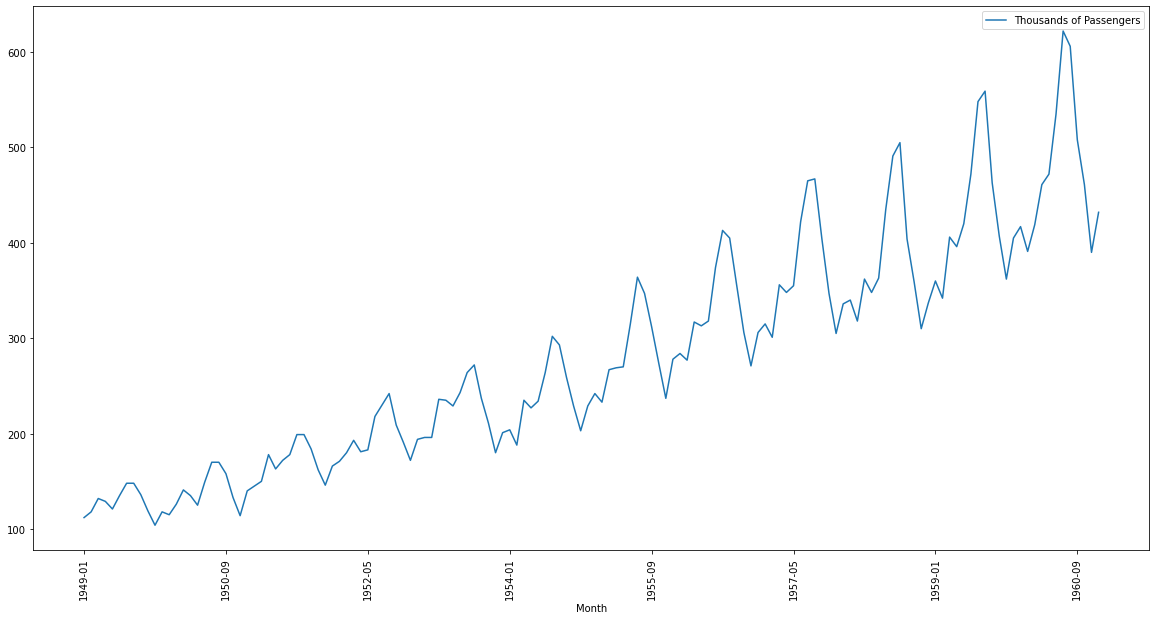

In [49]:
#plotting the graph for seeing Stationary Or Non Stationarity In data
data.plot(figsize = (20,10))
plt.xticks(rotation = 90)
plt.show()

### Check for AutoCorrelation

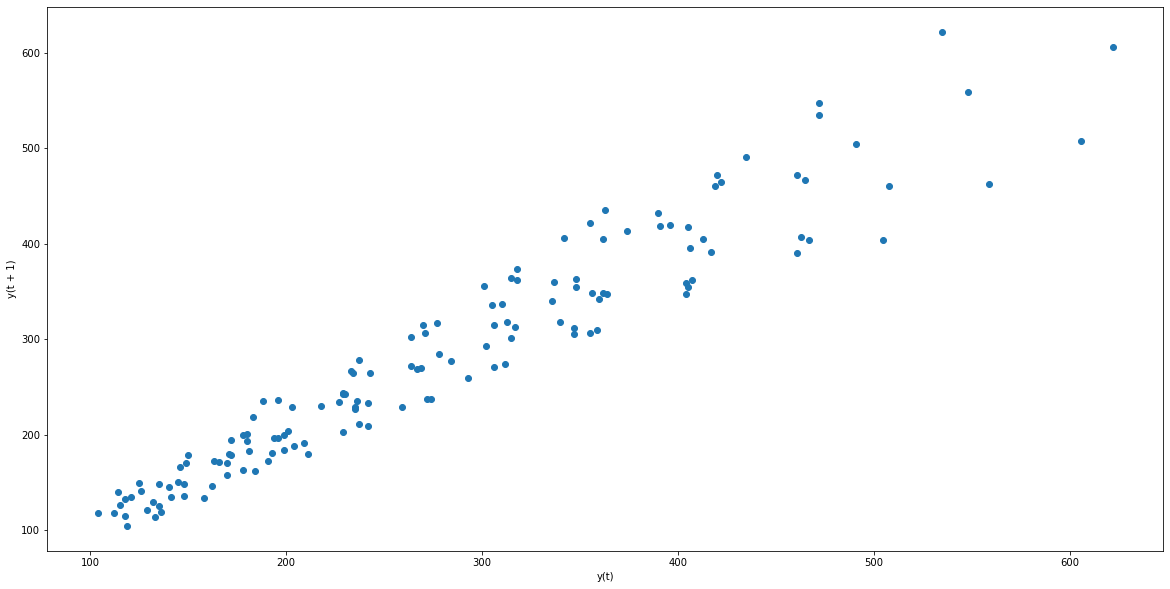

In [43]:
#lag_plot for checking auto correlation
#by lag_plot
from pandas.plotting import lag_plot
plt.figure(figsize=(20,10))
lag_plot(data)
plt.show()

### DataFrame Of Predicted And Lag

In [24]:
#checking correlation in terms of percentage
values = pd.DataFrame(data.values)

#creating dataframe with 1 lag value
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']

#result of correlation
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.960195
t+1  0.960195  1.000000


In [25]:
#printing dataframe
dataframe

,t-1,t+1
0,NaN,112.0
1,112.0,118.0
2,118.0,132.0
3,132.0,129.0
4,129.0,121.0
...,...,...
139,622.0,606.0
140,606.0,508.0
141,508.0,461.0
142,461.0,390.0


### Persistence Model

2965.2


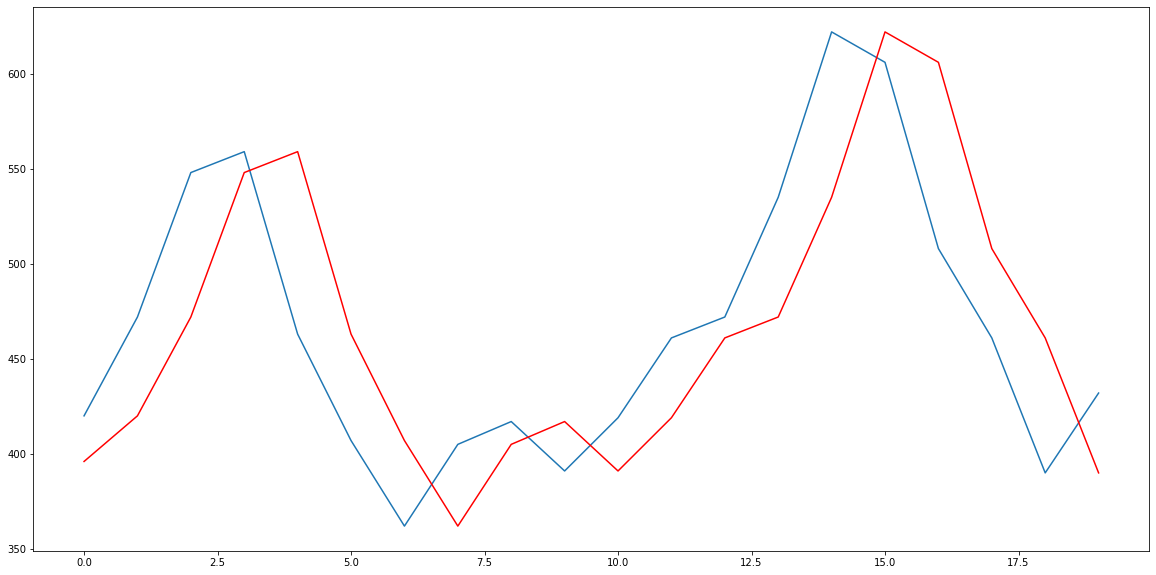

In [42]:
#importing accuracy checking methods
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#taking values from dataframe
X = dataframe.values

#spliting into test train
train, test = X[1:len(X)-20], X[len(X)-20:]

#training on X and testing on Y
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]


# persistence model
def model_persistence(x):
    return(x)

# Validations

predictions = list()

for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)

#mean-squared error 
test_score = mean_squared_error(test_y , predictions)

print(test_score)

# Actual Vs Predicted plot
plt.figure(figsize=(20,10))
plt.plot(test_y)
plt.plot(predictions , color = 'red')
plt.show()

### AR Model

In [27]:
#importing necessary packages
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

Coefficients: [13.923592    0.51874245 -0.32061259  0.24412724 -0.29791092  0.31889019
 -0.31003642  0.29532357 -0.34345579  0.32259178 -0.31151024  0.37558885
  0.53607392]
predicted=411.973507, expected=420.000000
predicted=467.087840, expected=472.000000
predicted=533.205602, expected=548.000000
predicted=548.002308, expected=559.000000
predicted=459.858504, expected=463.000000
predicted=398.871273, expected=407.000000
predicted=338.000231, expected=362.000000
predicted=361.565072, expected=405.000000
predicted=382.092040, expected=417.000000
predicted=379.051014, expected=391.000000
predicted=427.676477, expected=419.000000
predicted=425.049756, expected=461.000000
predicted=453.329237, expected=472.000000
predicted=505.162231, expected=535.000000
predicted=577.173244, expected=622.000000
predicted=594.201999, expected=606.000000
predicted=516.721546, expected=508.000000
predicted=442.169873, expected=461.000000
predicted=370.171158, expected=390.000000
predicted=385.859365, expect

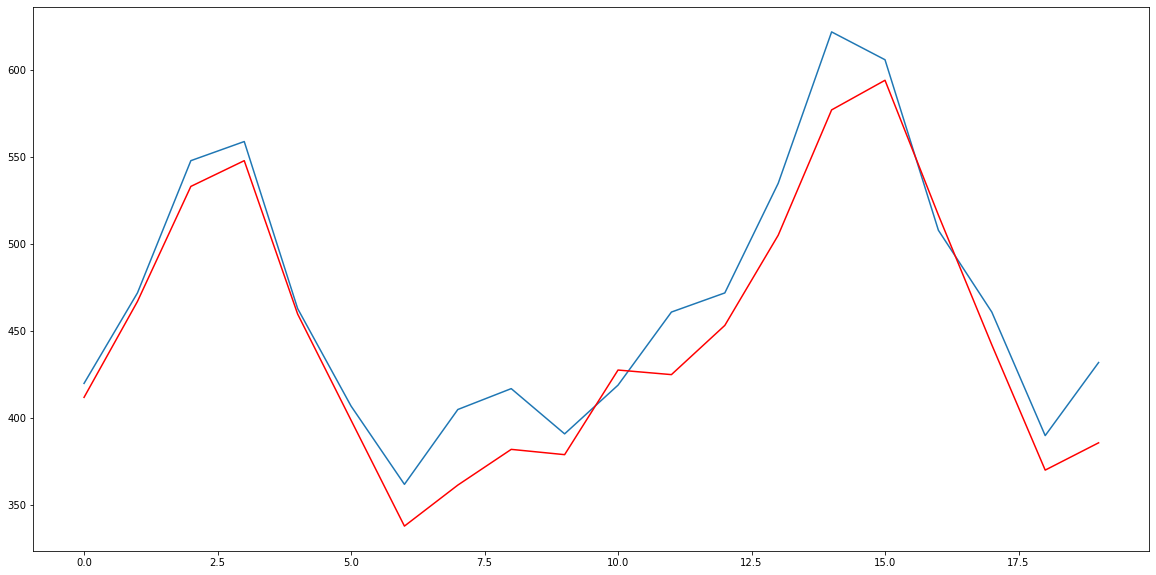

In [41]:
# split dataset
X = data.values
train, test = X[1:len(X)-20], X[len(X)-20:]


# train autoregression
model = AutoReg(train, lags=12)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)


# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test R2 Score: %.3f' % rmse)


# plot results
plt.figure(figsize=(20,10))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## Implementing Other 3 models with ARIMA Model

We change Parameters, Of ARIMA model only, we change the order parameter in it as (p,d,q).

p as AR Model

d for number of differencing

q as MA model

### MA Model

MA Model is the Moving Avearge Model, T it is impacted by unexpected external factors at various slots t-1,t-2,t-3,....,t-k, these factors are known as Residuals or Errors. 

The impact of previous time spots is decided by the coefficient factor α at that particular period of time.

This kind of model calculates the residuals or errors of past time series and calculates the present or future values in the series in know as Moving Average (MA) model.

Yt = α₁* Ɛₜ-₁ + α₂ * Ɛₜ-₂ + α₃ * Ɛₜ-₃ + ………… + αₖ * Ɛₜ-ₖ

a are the slopes

E are the Residuals

t-1,t-2 are the lags.

In [29]:
#impoting packages
from statsmodels.tsa.arima.model import ARIMA
from random import random
import warnings
warnings.filterwarnings('ignore')

# fit model
model = ARIMA(data, order=(0, 0, 35))
model_fit = model.fit()

# make prediction
y_p_ma = model_fit.predict(len(data)-10, len(data))
print(y_p_ma)

#accuracy score prediction
test_score = r2_score(data[len(data)-11:] , y_p_ma)
print(test_score)

1960-03-01    424.071867
1960-04-01    432.195452
1960-05-01    486.828007
1960-06-01    508.571520
1960-07-01    597.766377
1960-08-01    617.871847
1960-09-01    523.333595
1960-10-01    450.458602
1960-11-01    402.168725
1960-12-01    418.356343
1961-01-01    429.292753
Freq: MS, dtype: float64
0.654513421515293


### ARMA Model

ARMA Model is the combination of both models that are AutoRegression Model and Moving Average Model, this model adds up both the coefficients from the above two model that are residuals as well as value of the previous time step.

Yt = β₁* yₜ-₁ + α₁* Ɛₜ-₁ + β₂* yₜ-₂ + α₂ * Ɛₜ-₂ + β₃ * yₜ-₃ + α₃ * Ɛₜ-₃ +………… + βₖ * yₜ-ₖ + αₖ * Ɛₜ-ₖ

where beta(β) is the coeff. of AR Model and alpha(α) is the coeff. of MA Model in each time lag.

In [30]:
# fit model
model = ARIMA(data, order=(2, 0, 35))
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(data)-10, len(data))
print(yhat)

#accuracy score prediction
test_score = r2_score(data[len(data)-11:] , yhat)
print(test_score)

1960-03-01    422.519069
1960-04-01    430.674292
1960-05-01    490.994154
1960-06-01    527.652100
1960-07-01    605.774538
1960-08-01    626.004031
1960-09-01    516.032374
1960-10-01    463.608694
1960-11-01    395.966678
1960-12-01    415.613003
1961-01-01    437.164242
Freq: MS, dtype: float64
0.5989384209339008


### ARIMA Model

In Order to Apply Models, we must convert it into Stationery Time Series Data, In order to achieve this we apply the differencing or Integrated method where we subtract the t-1 value from t values of time series. After applying the first differencing if we are still unable to get the Stationary time series then we again apply the second-order differencing.


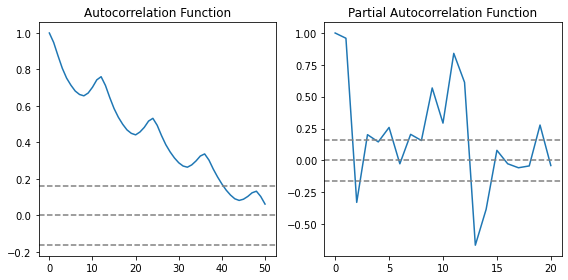

In [31]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(data, nlags=50)
lag_pacf = pacf(data, nlags=20, method='ols')


#Plot ACF: 
plt.figure(figsize=(8,4))
plt.subplot(121) 

plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)

plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [32]:
# fit model
model = ARIMA(data, order=(2, 1, 35))
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(data)-20, len(data), typ='levels')
print(yhat)

#accuracy score prediction
test_score = sqrt(mean_squared_error(data[len(data)-21:] , yhat))
print(test_score)

1959-05-01    426.857005
1959-06-01    450.993579
1959-07-01    520.724882
1959-08-01    555.134848
1959-09-01    459.450457
1959-10-01    418.349776
1959-11-01    376.844677
1959-12-01    389.523263
1960-01-01    425.933682
1960-02-01    405.376667
1960-03-01    421.529712
1960-04-01    439.490638
1960-05-01    482.010537
1960-06-01    515.037103
1960-07-01    594.656168
1960-08-01    612.329608
1960-09-01    539.349177
1960-10-01    446.520960
1960-11-01    426.274042
1960-12-01    427.740745
1961-01-01    465.711585
Freq: MS, dtype: float64
42.40866725987038


# Exponential Smoothing Models

### 1. Simple Exponential Smoothing

It is also known as Single Exponential Smoothing. In other models it is difficult to cover all the data and we have to use lag points to cover and predict the values, so in this we try to take more recent observations than from the past records.

Forecasts are calculated using weighted averages where the weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.

The Simple Exponential uses Alpha value to predicate the future values or values of test dates, also termed as smoothing_level, the simple exponential model does not include Trend and Seasonality into consideration, it is majorly used when the data does not have seasonality and trend.

The equation of the model is:

S_t = a.y_t + (1-a)S_t-1

S_t is the predicted value

a is the aplha value

y_t actual value at that data time

S_t-1 previous predicted value

Implementation Of Model as follows-:

Note-: As the Data has Trend and seasonality both so, the accuracy is low, it has only taken Level into Consideration.
The value of alpha should be between 0 and 1.

In [33]:
#importing packages of all 3 models
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

#fitting Simple Exp. Sm. Model for train
fit2 = SimpleExpSmoothing(train).fit(smoothing_level=0.6,optimized=False)

#forcesting for test
y_p_SES = fit2.forecast(len(test))

#printing predicted
print(y_p_SES)

#r2_score for Accuracy
test_score_1 = r2_score(data[len(data)-20:] , y_p_SES)
print(test_score_1)

[390.37452719 390.37452719 390.37452719 390.37452719 390.37452719
 390.37452719 390.37452719 390.37452719 390.37452719 390.37452719
 390.37452719 390.37452719 390.37452719 390.37452719 390.37452719
 390.37452719 390.37452719 390.37452719 390.37452719 390.37452719]
-1.1525442605575122


### 2. Holt’s Linear Trend Method

It is also known as Double Exponential Smoothing Model. This model works on High variations in data, In other method it does not take into consideration the trend, but in this method it takes level and trend into consideration and do not take seasonality into consideration. If the Data has Trend and Level then only this method is used.

Holt extended simple exponential smoothing to allow forecasting of data with a trend. It is nothing more than exponential smoothing applied to both level(the average value in the series) and trend. In this we take a alpha value for the level and beta value for the trend the equations can be as-:

S_t = l_t + h.b_t

where l_t is level and given as

l_t = a.y_t + (1-a)l_t-1

and b_t is trend given as 

b_t = B(l_t - l_t-1) + (1 - B)b_t-1

where a is alpha, B is beta(smoothing slope)

Implementation Of Model as follows-:

Note-: As the Data has Trend and seasonality both so, the accuracy is low,it has only taken Level and Trend into Consideration.
The value of alpha and beta should be between 0 and 1.

In [34]:
#fitting Double Exp. Sm. Model for train with
#both alpha and beta
fit1 = Holt(train).fit(smoothing_level = 0.3,smoothing_slope = 0.1)

#forcesting for test
y_p_HEP = fit1.forecast(len(test))

#printing predicted
print(y_p_HEP)

#r2_score for Accuracy
test_score_2 = r2_score(data[len(data)-20:] , y_p_HEP)
print(test_score_2)

[378.85143576 378.88490372 378.91837169 378.95183966 378.98530763
 379.0187756  379.05224357 379.08571154 379.11917951 379.15264747
 379.18611544 379.21958341 379.25305138 379.28651935 379.31998732
 379.35345529 379.38692326 379.42039123 379.45385919 379.48732716]
-1.5110984676595507


### 3. Holt-Winters Method

It is also known as Triple Exponential Smoothing Model. The above mentioned models don’t take into account the seasonality of the dataset while forecasting. Hence we need a method that takes into account both trend and seasonality to forecast future prices. One such algorithm that we can use in such a scenario is Holt’s Winter method. The idea behind triple exponential smoothing(Holt’s Winter) is to apply exponential smoothing to the seasonal components in addition to level and trend.

It takes all three into consideration that is level, trend and sesonality and predictes the values, it is used when data has all the three components. It Uses alpha. beta and gamma values for level, trend and seasonality respectively.

The equation can be as-:

P_t = l_t + h.b_t + S_t+k-s

where l_t for level as,

l_t = a.y_t + (1-a)l_t-1

b_t is trend given as 

b_t = B(l_t - l_t-1) + (1 - B)b_t-1

and S_t+k-s is Seasonality as

S_t = Y(y_t - l_t) + (1 - Y)S_t-s

where a is alpha, B is beta, Y is gamma(seasonal_periods)

Note that the seasonal component can be in the additive or multiplicative form. This means that the final forecast can be in either of the two forms:

Ŷt+1 = (Level + Trend) + Seasonality

Ŷt+1 = (Level + Trend) x Seasonality

Implementation Of Model as follows-:

In [35]:
#fitting Triple Exp. Sm. Model for train with
#alpha, beta and gamma values
fit = ExponentialSmoothing((train) ,seasonal_periods=12 ,trend='add', seasonal='multiplicative').fit()

#forcesting for test
y_p_ES = fit.forecast(len(test))

#printing predicted
print(y_p_ES)

#r2_score for Accuracy
test_score_3 = sqrt(mean_squared_error(data[len(data)-20:] , y_p_ES))
print(test_score_3)

[409.52317834 491.11878056 550.21714575 556.64055573 449.96591337
 398.25264721 344.62991352 377.64938797 400.04759617 377.55321793
 443.0037833  422.57854606 443.29984101 531.34877973 594.98260775
 601.62364006 486.08519721 430.00842467 371.92853955 407.36736662]
20.325779948282833


### Plot For Comparision Between AR predictions and Holt Winters Method Predictions

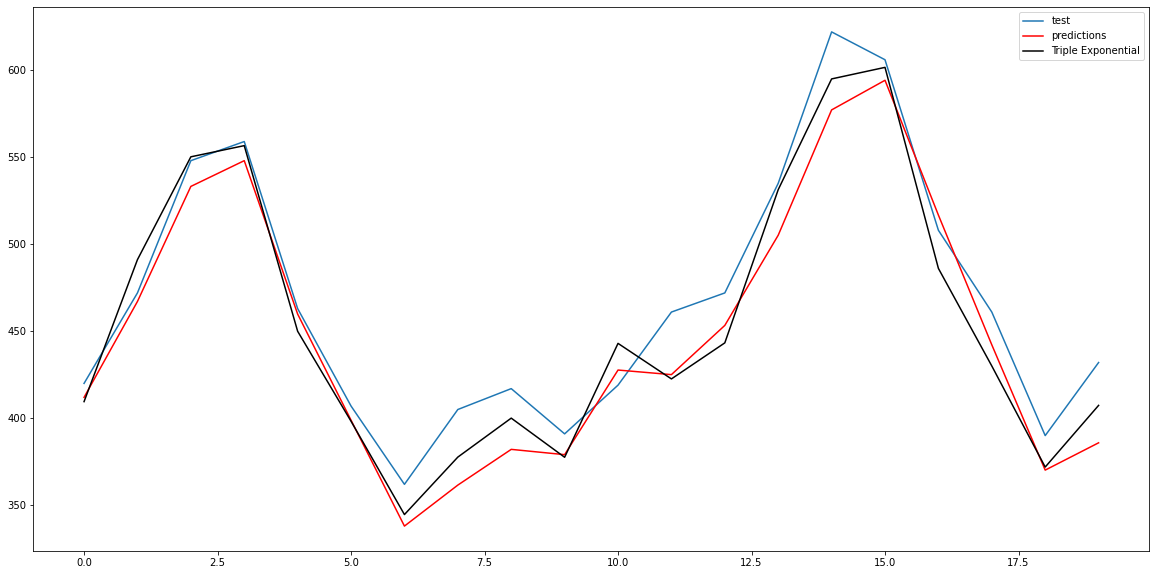

In [36]:
#blue for expected
#red for AR
#black for HWM

plt.figure(figsize=(20,10))
plt.plot(test,label='test')
plt.plot(predictions, color='red',label='predictions')
plt.plot(y_p_ES, color='black',label='Triple Exponential')
plt.legend(loc='best')
plt.show()

### Plot For Comparision Between ARIMA predictions and Holt Winters Method Predictions

In [37]:
yhat = list(yhat)
yhat

[426.85700471793206,
 450.9935788750909,
 520.7248820464023,
 555.1348479744212,
 459.45045709335875,
 418.3497757310064,
 376.84467690504164,
 389.5232627020981,
 425.93368241557516,
 405.376667248088,
 421.5297121395488,
 439.4906375400329,
 482.01053727318083,
 515.0371031296027,
 594.6561684229655,
 612.3296083221595,
 539.3491765510321,
 446.5209602693757,
 426.2740421706719,
 427.7407453684892,
 465.71158483779595]

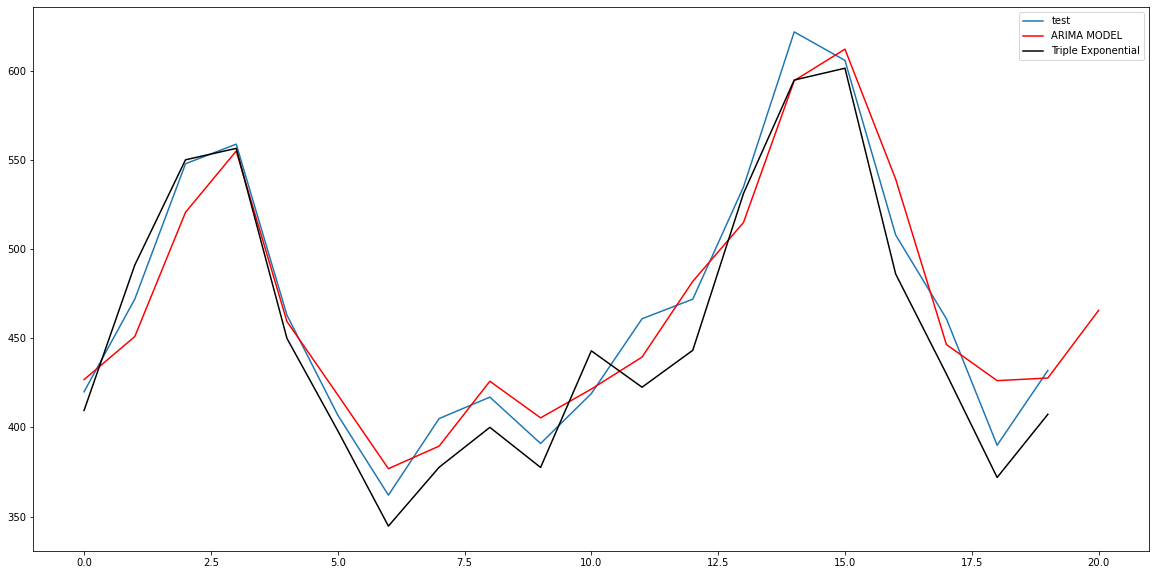

In [38]:
#blue for expected
#red for ARIMA
#black for HWM

plt.figure(figsize=(20,10))
plt.plot(test,label='test')
plt.plot(yhat, color='red',label='ARIMA MODEL')
plt.plot(y_p_ES, color='black',label='Triple Exponential')
plt.legend(loc='best')
plt.show()

### Accuracy Comparision Between AR, ARIMA And Holt Winters Method

In [39]:
a = ["Accuracy"]
accuracy = pd.DataFrame(index = a)

accuracy["AR"] = rmse
accuracy["ARIMA MODEL"] = test_score
accuracy["Triple Exponential"] = test_score_3


In [40]:
accuracy

,AR,ARIMA MODEL,Triple Exponential
Accuracy,24.531868,42.408667,20.32578
